<a href="https://colab.research.google.com/github/j20nch/class2022Spring/blob/main/pytorch_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Pytorch Hub](https://pytorch.org/hub/research-models)

제목에 아예 researchers가 많이 쓴다고 명시해놨음.

> image generation (e.g. [PGAN](https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/)) (progressive growing of gans)

celebrity 얼굴을 막 만들어내는 것. 세상에 존재하지 않는 걸 계속 새롭게. (원래 기존에 있던 게 아니라 새로운 걸 만들어준다고 생각하면 됨)

In [1]:
import torch
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'PGAN', model_name='celebAHQ-512', pretrained=True)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth


  0%|          | 0.00/264M [00:00<?, ?B/s]

Average network found !


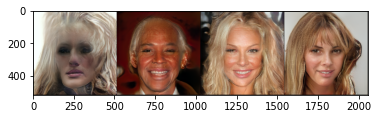

In [3]:
num_images = 4 # 이미지 개수
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise) #model.test에 noise를 넣어주면 이미지를 만들어줌.

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

노이즈를 왜 넣어주는가? 
원래부터 모델이 그렇게 훈련된 것. 여기선 입력이 noise(random한 숫자들)임. random한 숫자들이 random한 얼굴을 만들어내는 것. 사람 얼굴이 4개 필요하니까 noise 4개를 만들어주고, 그 noise를 넣어주면 generated images 4개를 만들어주는.